# Major US Oil and Gas Stock Price EDA


This script performs exploratory data analysis (EDA) on the stock prices of major US oil and gas companies.
 Below is a breakdown of the process and key steps, along with some improvements and potential additional analysis you might consider.

# Importing Necessary Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns
import os

plt.style.use("seaborn-dark-palette")

ImportError: cannot import name 'cbook' from partially initialized module 'matplotlib' (most likely due to a circular import) (c:\Users\User\anaconda3\ttt adac\lib\site-packages\matplotlib\__init__.py)

# Loading the Dataset
You load the dataset into a pandas DataFrame and examine the structure of the data:

In [4]:
df = pd.read_csv(r"C:\Users\User\Documents\IRON HACK DA 2024\IH-Labs W8\Final-Project\Data\Raw data\oil and gas stock prices.csv")
df

Date Symbol   Open   High    Low  Close    Volume Currency
0      2000-01-03    XOM  39.75  40.38  38.94  39.16  13458200      USD
1      2000-01-04    XOM  38.69  39.09  38.25  38.41  14510800      USD
2      2000-01-05    XOM  39.00  40.88  38.91  40.50  17485000      USD
3      2000-01-06    XOM  40.31  42.91  40.09  42.59  19462000      USD
4      2000-01-07    XOM  42.97  43.12  42.00  42.47  16603800      USD
...           ...    ...    ...    ...    ...    ...       ...      ...
39196  2022-06-06    SLB  47.79  48.00  46.88  47.22   6696970      USD
39197  2022-06-07    SLB  47.00  49.08  46.87  48.93  14692203      USD
39198  2022-06-08    SLB  49.00  49.83  48.08  49.57  15067131      USD
39199  2022-06-09    SLB  48.79  49.16  48.10  48.14  11447491      USD
39200  2022-06-10    SLB  47.17  47.88  46.52  47.21  11291267      USD

[39201 rows x 8 columns]

In [5]:
# Display the first few rows of the dataframe
df.head()

Date Symbol   Open   High    Low  Close    Volume Currency
0  2000-01-03    XOM  39.75  40.38  38.94  39.16  13458200      USD
1  2000-01-04    XOM  38.69  39.09  38.25  38.41  14510800      USD
2  2000-01-05    XOM  39.00  40.88  38.91  40.50  17485000      USD
3  2000-01-06    XOM  40.31  42.91  40.09  42.59  19462000      USD
4  2000-01-07    XOM  42.97  43.12  42.00  42.47  16603800      USD

In [4]:
# Display the last few rows of the dataframe
df.tail()


Date Symbol   Open   High    Low  Close    Volume Currency
39196  2022-06-06    SLB  47.79  48.00  46.88  47.22   6696970      USD
39197  2022-06-07    SLB  47.00  49.08  46.87  48.93  14692203      USD
39198  2022-06-08    SLB  49.00  49.83  48.08  49.57  15067131      USD
39199  2022-06-09    SLB  48.79  49.16  48.10  48.14  11447491      USD
39200  2022-06-10    SLB  47.17  47.88  46.52  47.21  11291267      USD

In [5]:
# Display the shape of the dataframe
df.shape

(39201, 8)

In [6]:
df.columns

Index(['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')

In [7]:
df.nunique()

Date         5647
Symbol          8
Open        10964
High        11013
Low         10906
Close       11066
Volume      38380
Currency        1
dtype: int64

In [8]:
df.value_counts()

Date        Symbol  Open    High    Low    Close   Volume    Currency
2000-01-03  COP     17.72   17.77   17.25  17.27   1419600   USD         1
2015-12-16  COP     50.30   50.84   49.12  49.35   11438912  USD         1
2015-12-15  CVX     90.58   93.40   90.55  92.76   19158528  USD         1
            MPC     48.96   49.74   48.35  49.16   9240229   USD         1
            MRO     14.27   14.50   13.93  14.46   12972855  USD         1
                                                                        ..
2008-09-02  COP     61.28   61.43   59.83  60.22   12633445  USD         1
            CVX     84.49   84.61   83.21  83.29   13445513  USD         1
            MRO     26.56   27.00   26.10  26.13   5300560   USD         1
            SLB     92.08   92.08   90.08  90.46   11913208  USD         1
2022-06-10  XOM     101.94  103.35  99.79  100.46  30764130  USD         1
Length: 39201, dtype: int64

In [9]:
df.isna().sum()

Date        0
Symbol      0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [10]:
df.duplicated().value_counts()

False    39201
dtype: int64

In [11]:
df['Volume']=df['Volume'].astype(float)

In [12]:
df.dtypes

Date         object
Symbol       object
Open        float64
High        float64
Low         float64
Close       float64
Volume      float64
Currency     object
dtype: object

In [13]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39201 entries, 0 to 39200
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      39201 non-null  object 
 1   Symbol    39201 non-null  object 
 2   Open      39201 non-null  float64
 3   High      39201 non-null  float64
 4   Low       39201 non-null  float64
 5   Close     39201 non-null  float64
 6   Volume    39201 non-null  float64
 7   Currency  39201 non-null  object 
dtypes: float64(5), object(3)
memory usage: 2.4+ MB


In [14]:
df['Date'].unique()

array(['2000-01-03', '2000-01-04', '2000-01-05', ..., '2022-06-08',
       '2022-06-09', '2022-06-10'], dtype=object)

In [15]:
df['Symbol'].unique()

array(['XOM', 'CVX', 'COP', 'MPC', 'PSX', 'VLO', 'MRO', 'SLB'],
      dtype=object)

In [16]:
df['Open'].unique()

array([39.75, 38.69, 39.  , ..., 29.83, 35.29, 42.68])

In [17]:
df['High'].unique()

array([40.38, 39.09, 40.88, ..., 34.18, 28.55, 38.53])

In [18]:
df['Low'].unique()

array([38.94, 38.25, 38.91, ..., 28.56, 28.96, 45.43])

In [19]:
df['Volume'].unique()

array([13458200., 14510800., 17485000., ..., 15067131., 11447491.,
       11291267.])

In [20]:
df['Currency'].unique()

array(['USD'], dtype=object)

In [21]:
# Summary Statistics
df.describe().style.background_gradient(cmap = "cividis")


# Overview of the Dataset
1. The dataset contains stock price data for several major US oil and gas companies.
2. The companies include Exxon Mobil (XOM), Chevron (CVX), ConocoPhillips (COP), and others.

# Visualizing Stock Trading Data

The script uses Plotly to visualize the distribution of trading attributes (e.g., Open, High, Volume) for each company over time:

In [22]:
# Histogram of trading attributes
for y in ["Open", "High", "Volume"]: 
    fig = px.histogram(df, x="Date", y=y, color="Symbol",
                       color_discrete_sequence=px.colors.qualitative.Set2,
                       title=f"Total Trading {y} Distribution of Major US Oil Companies")
    fig.update_layout(template="plotly_dark", font=dict(family="PT Sans", size=18))
    fig.show()

# Visualizing All Attributes Together
You visualize all the attributes in the DataFrame as subplots, which is a quick way to inspect trends

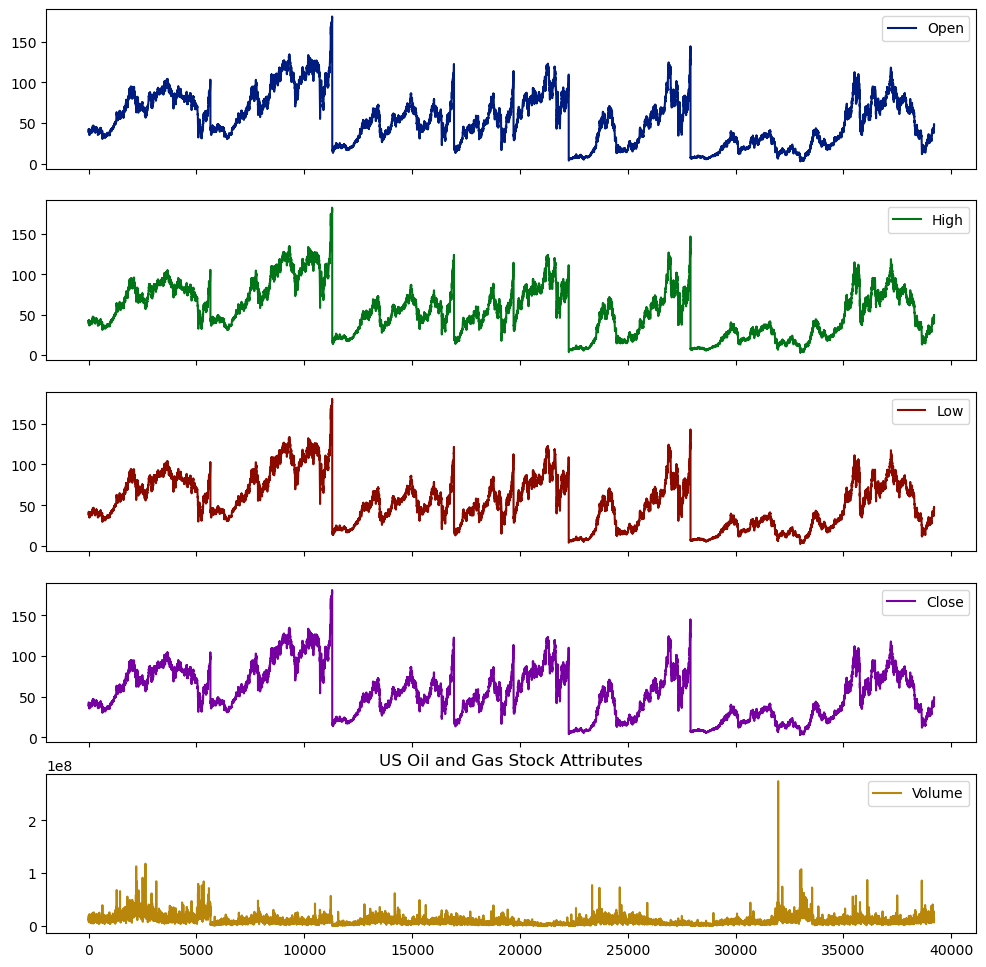

In [23]:

df.plot(subplots=True, figsize=(12, 12), linewidth=1.5)
plt.title("US Oil and Gas Stock Attributes")
plt.show()

# Volume Trend Visualization
A bar plot is used to visualize the trend of trading volume over time

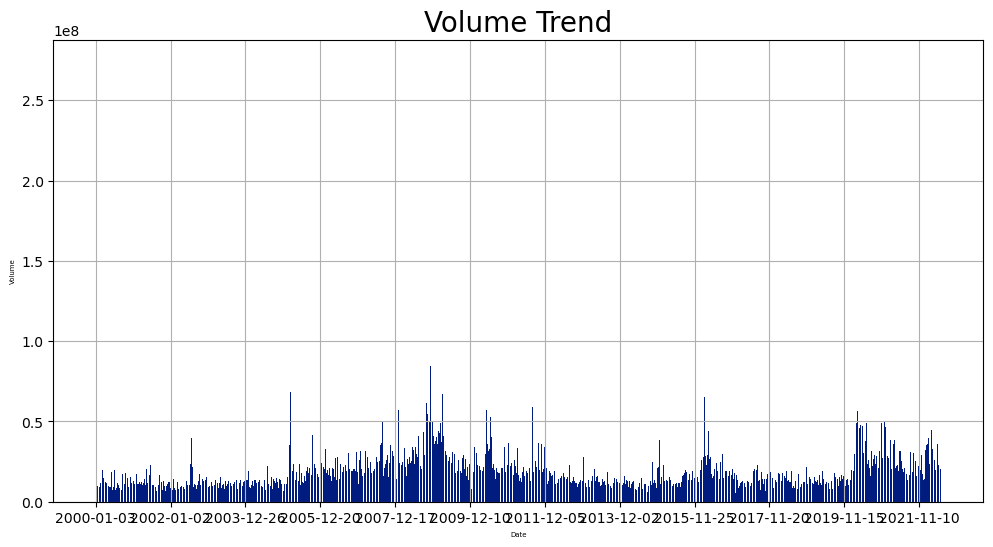

In [24]:

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(df["Date"], df["Volume"])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel("Date", fontsize=5)
ax.set_ylabel("Volume", fontsize=5)
plt.title('Volume Trend', fontsize=20)
plt.grid()
plt.show()

In [25]:
!pip install autoviz


  Using cached autoviz-0.1.905-py3-none-any.whl (67 kB)
  Using cached emoji-2.12.1-py3-none-any.whl (431 kB)
  Using cached pandas-2.2.2-cp39-cp39-win_amd64.whl (11.6 MB)
  Using cached xgboost-1.6.2-py3-none-win_amd64.whl (125.4 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached pandas_dq-1.29-py3-none-any.whl (29 kB)
  Using cached holoviews-1.19.1-py3-none-any.whl (5.0 MB)
  Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)
  Using cached wordcloud-1.9.3-cp39-cp39-win_amd64.whl (300 kB)
  Using cached panel-1.4.5-py3-none-any.whl (24.7 MB)
  Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl (7.8 MB)
  Using cached hvplot-0.10.0-py3-none-any.whl (155 kB)
  Using cached numpy-2.0.1-cp39-cp39-win_amd64.whl (16.6 MB)
  Using cached pyamg-5.2.1-cp39-cp39-win_amd64.whl (1.6 MB)
  Using cached param-2.1.1-py3-none-any.whl (116 kB)
  Using cached bokeh-3.4.3-py3-none-any.whl (7.0 MB)
  Using cached pyviz_comms-3.0.3-py3-none-any.whl (83 kB)
  Using ca

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\user\\anaconda3\\anaconda 4\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Bold.ttf'
Consider using the `--user` option or check the permissions.



# Moving Averages
You calculate and visualize the 20-day and 50-day moving averages of the opening prices

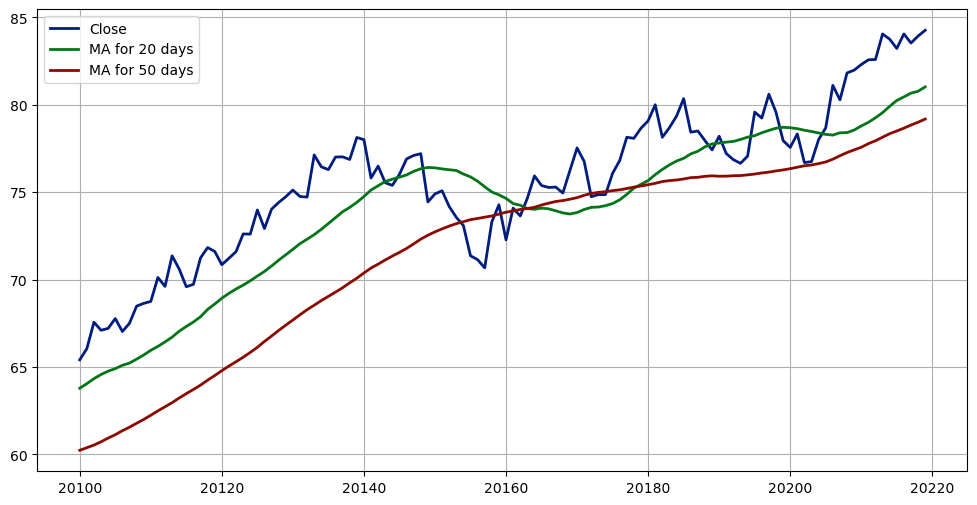

In [40]:
df["MA for 20 days"] = df["Open"].rolling(20).mean()
df["MA for 50 days"] = df["Open"].rolling(50).mean()
df.truncate(before="2010-01-01", after="2022-06-10")[["Close", "MA for 20 days", "MA for 50 days"]].plot(subplots=False, figsize=(12, 6), linewidth=2)
plt.grid()
plt.show()

# Distribution of Opening Prices
Finally, you use Seaborn to plot the distribution of opening prices

c:\Users\User\anaconda3\anaconda 4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'Open Price')

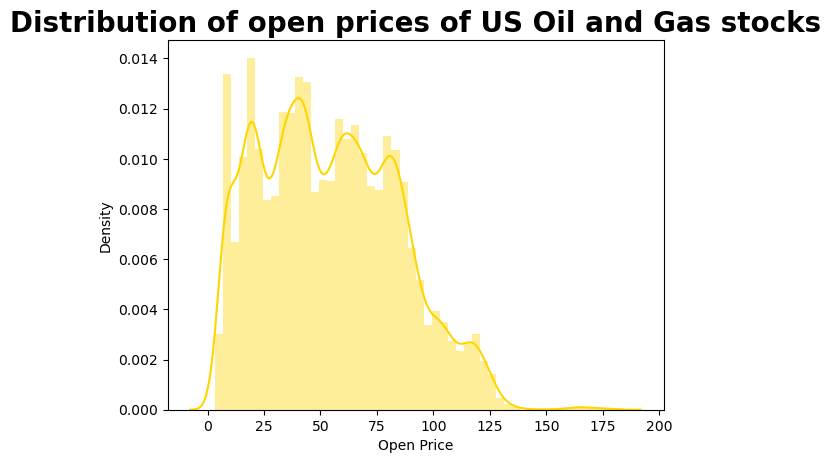

In [41]:

sns.distplot(df["Open"], color="#FFD500")
plt.title("Distribution of open prices of US Oil and Gas stocks", fontweight="bold", fontsize=20)
plt.xlabel("Open Price", fontsize=10)


c:\Users\User\anaconda3\anaconda 4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\User\anaconda3\anaconda 4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\User\anaconda3\anaconda 4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\User

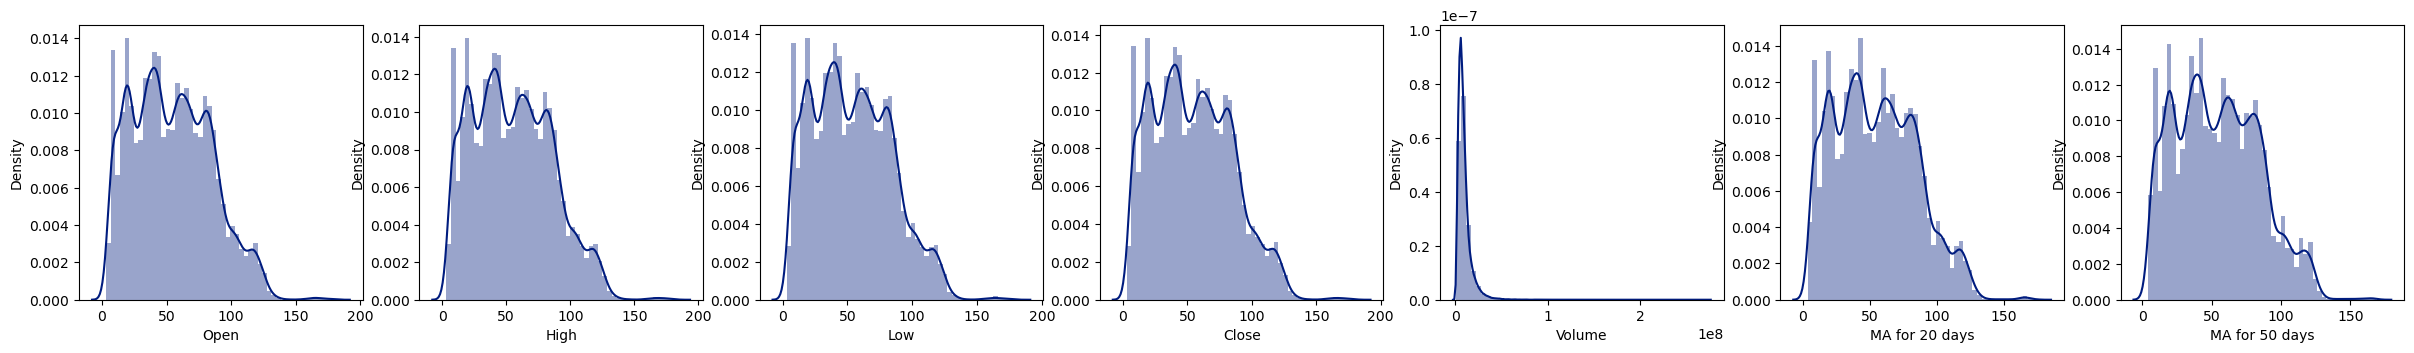

In [42]:
count=1
plt.subplots(figsize=(30,25))
for i in df.columns:
    if df[i].dtypes!='object':
        plt.subplot(6,7,count)
        sns.distplot(df[i])
        count+=1

plt.show()

c:\Users\User\anaconda3\anaconda 4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\User\anaconda3\anaconda 4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\User\anaconda3\anaconda 4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\User\anaconda3\anaconda 4\lib\site-pa

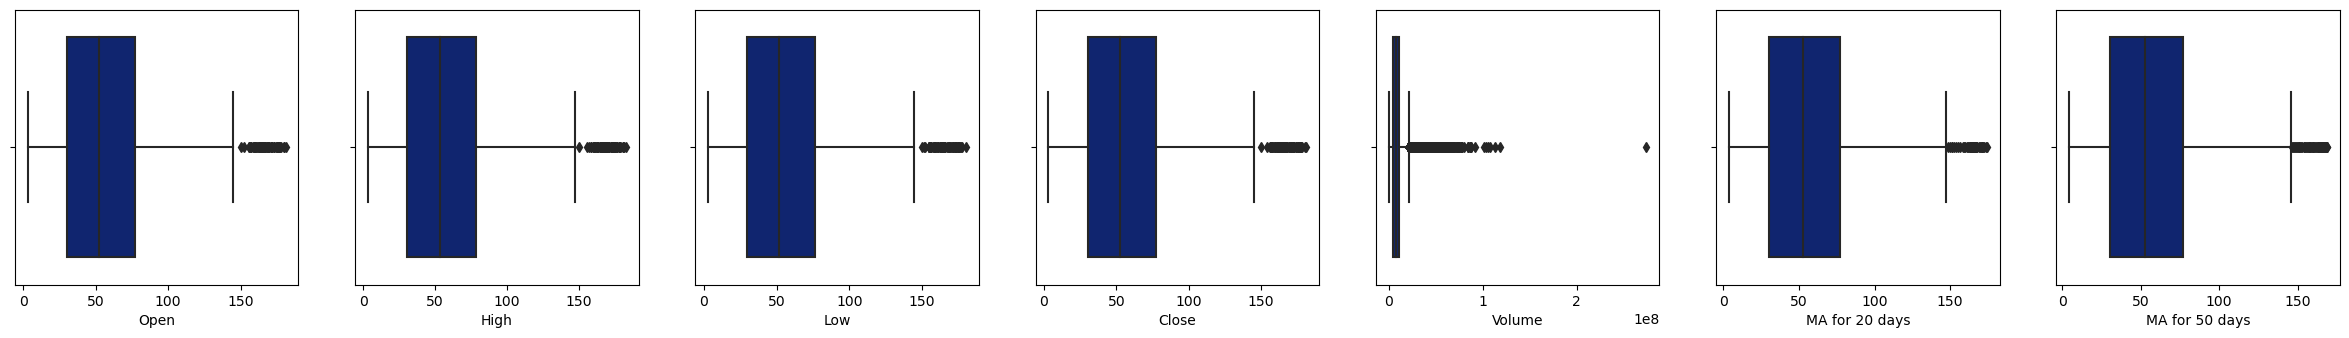

In [43]:
count=1
plt.subplots(figsize=(30,25))
for i in df.columns:
    if df[i].dtypes!='object':
        plt.subplot(6,7,count)
        sns.boxplot(df[i])
        count+=1

plt.show()

# Summary Statistics
You print out the maximum and minimum opening prices

In [44]:
# Summary Statistics
print("Maximum open price of stock ever obtained:", df["Open"].max())
print("Minimum open price of stock ever obtained:", df["Open"].min())

Maximum open price of stock ever obtained: 180.95
Minimum open price of stock ever obtained: 3.22


# Missing Data Handling
First, check for any missing data and decide how to handle it:


If the amount of missing data is small, you might opt to drop those rows.

For larger gaps, consider forward or backward filling, or more sophisticated methods like interpolation.

In [45]:
# Check for missing values
missing_data = df.isnull().sum()
print(missing_data)

Date               0
Symbol             0
Open               0
High               0
Low                0
Close              0
Volume             0
Currency           0
MA for 20 days    19
MA for 50 days    49
dtype: int64


<AxesSubplot:>

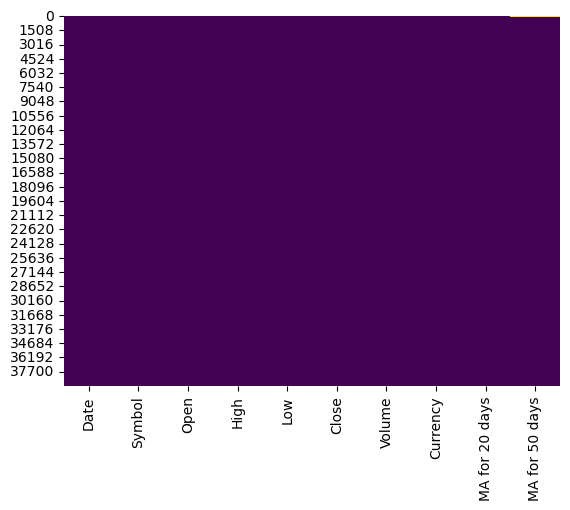

In [46]:
# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")

In [47]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Correlation Analysis

Explore how the stock attributes correlate with each other. This can help identify patterns or redundancy in the data.

Interpretation:

Look for high correlations that might indicate multicollinearity.   

Investigate any unexpected correlations that could lead to new insights.

In [48]:

# Calculate correlation matrix
corr_matrix = df.corr()

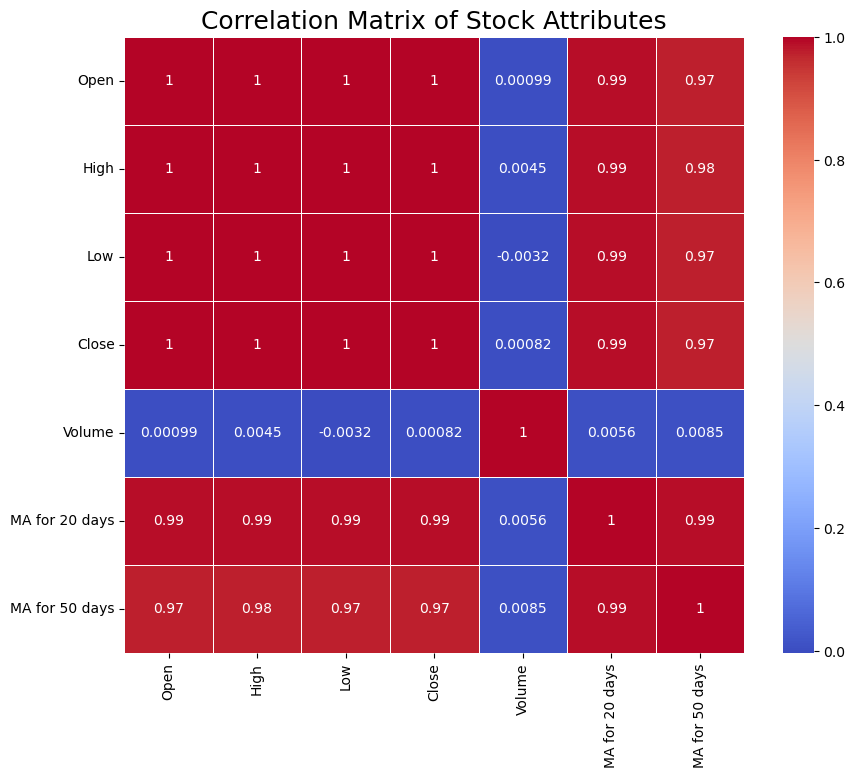

In [49]:
# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Stock Attributes", fontsize=18)
plt.show()

# Time Series Analysis
Decompose the time series data to analyze trends, seasonality, and residuals.

In [7]:
# Decompose the time series data
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df['Close'], model='multiplicative', period=365)


In [8]:
# Plot the decomposed components
decomposed.plot()
plt.suptitle('Time Series Decomposition of Close Price', fontsize=18)
plt.show()

ImportError: Matplotlib is not found.

# Comparison of Companies

Use visualizations to compare stock price trends, volatilities, and other key metrics across different companies.

In [ ]:
# Closing Price Trends
fig = px.line(df, x="Date", y="Close", color="Symbol", title="Closing Price Trends of Major US Oil Companies")
fig.update_layout(template="plotly_dark", font=dict(family="PT Sans", size=18))
fig.show()

In [ ]:
# Boxplot to Compare Volatilities
plt.figure(figsize=(12, 6))
sns.boxplot(x="Symbol", y="Close", data=df)
plt.title("Volatility Comparison of Closing Prices", fontsize=18)
plt.show()

Insights:

Identify which companies have the most stable or volatile stock prices.

Compare the overall performance of different companies.

# Outlier Detection
Identify and visualize any outliers in the data

In [ ]:
# Boxplot to Identify Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.title('Outlier Detection in Stock Attributes', fontsize=18)
plt.show()

In [ ]:
# Using Z-scores for Outlier Detection
from scipy import stats

z_scores = np.abs(stats.zscore(df[['Open', 'High', 'Low', 'Close', 'Volume']]))
outliers = np.where(z_scores > 3)
print(f"Outliers Detected:\n{outliers}")

 Handling Outliers:

Decide whether to remove or adjust outliers based on their impact on the analysis.

# Interactive Dashboards with Dash
Consider building a Dash app for more interactive exploration.
Benefits:

Users can select different companies to compare.

Provides a more interactive way to explore the data.

In [ ]:
# Installation of Dash (if not already installed)
!pip install jupyter-dash



In [ ]:
from jupyter_dash import JupyterDash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Initialize the JupyterDash app
app = JupyterDash(__name__)

# Layout of the app
app.layout = html.Div([
    dcc.Graph(id='price-time-series'),
    dcc.Dropdown(
        id='company-selector',
        options=[{'label': symbol, 'value': symbol} for symbol in df['Symbol'].unique()],
        value='XOM',  # Default value
        multi=True
    )
])

# Callback for updating the time series based on selected company
@app.callback(
    Output('price-time-series', 'figure'),
    Input('company-selector', 'value')
)
def update_graph(selected_symbols):
    if isinstance(selected_symbols, str):
        selected_symbols = [selected_symbols]
        
    filtered_df = df[df['Symbol'].isin(selected_symbols)]
    fig = px.line(filtered_df, x='Date', y='Close', color='Symbol')
    return fig

# Run the app in Jupyter notebook
app.run_server(mode='inline', port=8090)
